In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Rval = np.linspace(0.001,1,10000)
con = 4*3.14*8.8e-10
def E(Q,r,con):
    EE = Q/(con*r**2)
    return EE

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


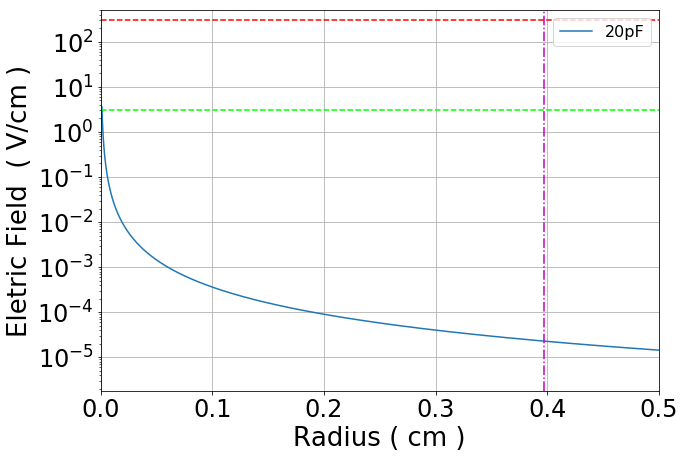

In [4]:
plt.figure(figsize=(10,7))

#Q = 100e-12*300
#plt.plot(Rval,E(Q,Rval,con),label="100pF")

#Q = 10e-12*300
#plt.plot(Rval,E(Q,Rval,con),label="10pF")

Q = 20e-12*2e-3#300
plt.plot(Rval,E(Q,Rval,con),label="20pF")

#Q = 1e-12*300
#plt.plot(Rval,E(Q,Rval,con),label="1pF")

plt.semilogy()
#plt.loglog()
plt.ylim(0,500)
plt.xlim(0,0.5)
plt.axhline(300, color='r',linestyle="--")
plt.axhline(3, color='lime',linestyle="--")

plt.axvline(0.397, color='m',linestyle="-.")

plt.xlabel(r'Radius ( cm )',fontsize=26)
plt.ylabel(r'Eletric Field  ( V/cm )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)



In [22]:
np.sqrt((0.417 - 0.291*np.cos(np.deg2rad(33.18)))**2 + (0.291*np.sin(np.deg2rad(33.18)))**2)

0.23546962991822243

In [21]:
np.cos(90/360.*2.*np.pi)
np.cos(np.deg2rad(90))

6.123233995736766e-17

In [35]:
VG = 0.237 # V
VX = 0.178 # V
RS = 3.3 # Ohm
f = 700 # Hz
alpha = 25

In [39]:
VRS = np.sqrt((VG - VX*np.cos(np.deg2rad(alpha)))**2 + (VX*np.sin(np.deg2rad(alpha)))**2) 
IG = VRS/RS
phi = 90 - (alpha + np.rad2deg(np.arccos((VG - VX*np.cos(np.deg2rad(alpha)))/(VRS))))
VCX = VX*np.cos(np.deg2rad(phi))
XC = VCX/IG
CX = 1./(2.*np.pi*f*XC)

## Below is the measurements of the capacatence  between the gold and FC top

In [259]:
VG = np.array([0.781,0.9982,0.996,0.99378,0.99115,0.9895,0.9883,0.9874,0.9809]) # V
VX = np.array([0.748,0.8327,0.756,0.68979,0.5597,0.4661,0.3642,0.2234,0.1135]) # V
RS = 2.7e3 # Ohm
f1 = np.array([1e3,300e3,400e3,500e3,700e3,900e3,1.2e6,2.0e6,4.0e6]) # Hz
alpha = np.array([0.69,31.2,38.6,44.9,54.3,60.4,66.6,74.2,77.2]) # degrees
Cp = 10e-12 # F

In [260]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f1*XC)
XX = 1./(2.*np.pi*f1*(Ct))
CX1 = Ct - Cp

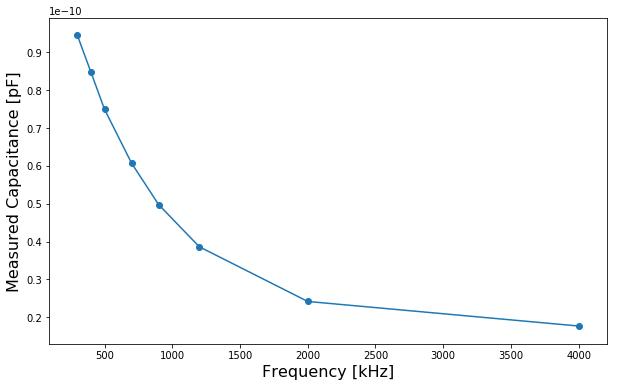

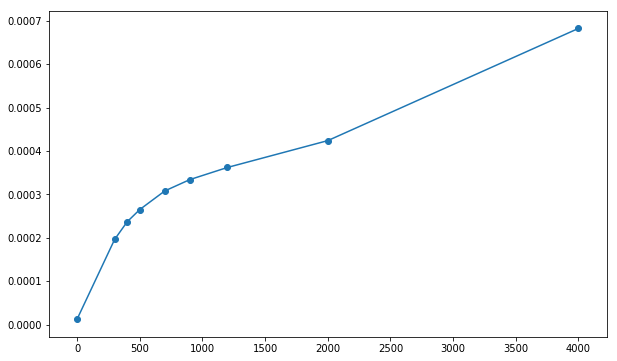

In [261]:
plt.figure(figsize=(10,6))
plt.plot(f[1:]*1e-3,CX1[1:])
plt.scatter(f[1:]*1e-3,CX1[1:])

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)

plt.figure(figsize=(10,6))
#plt.plot(f*1e-3,CX)
plt.plot(f1*1e-3,VG/XC)
plt.scatter(f1*1e-3,VG/XC)

In [263]:
print('C = %s pF'%(CX1*1e12))

C = [2689.64119634   94.45511666   84.72332168   74.94060351   60.68569398
   49.73707622   38.60871378   24.16821415   17.67631321] pF


## Below is the same measurements with a larger resistor (120 kOhm)

In [273]:
VG = np.array([4.885,4.856,4.870,4.923,4.965]) # V
VX = np.array([4.634,3.508,2.295,1.029,0.539]) # V
RS = 120e3 # Ohm
f2 = np.array([1e3,10e3,20e3,50e3,100e3]) # Hz
alpha = np.array([5.64,41.20,59.8,73.8,75.3]) # degrees
Cp = 10e-12 # F

In [274]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f2*XC)
XX = 1./(2.*np.pi*f2*(Ct))
CX2 = Ct - Cp

In [275]:
print('C = %s pF'%(CX2*1e12))

C = [141.29765676  81.0848917   51.21888139  24.09005011  20.32316268] pF


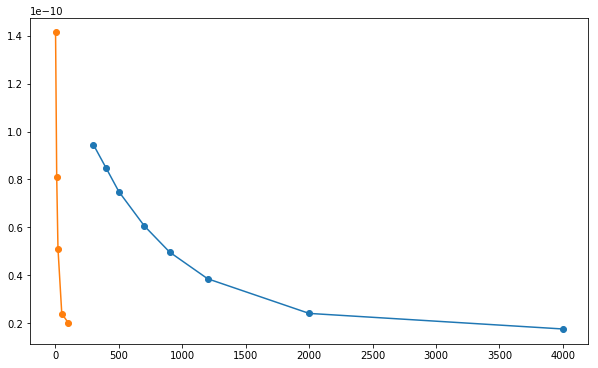

In [276]:
plt.figure(figsize=(10,6))
plt.plot(f1[1:]*1e-3,CX1[1:],'o-')
plt.plot(f2*1e-3,CX2,'o-')

## Below is the same measurements with a smaller resistor (1.2 kOhm)

In [340]:
VG = np.array([5.924,5.980,5.940,5.907,5.863,5.800,5.775,5.740,5.718,5.662,5.601,5.512,5.298]) # V
VX = np.array([5.760,5.796,5.274,4.869,4.255,3.055,2.285,1.790,1.443,1.139,0.943,0.731,0.503]) # V
RS = 1.2e3 # Ohm
f3 = np.array([50e3,100e3,500e3,700e3,1e6,1.75e6,2.5e6,3.25e6,4e6,5e6,6e6,7.5e6,10e6]) # Hz
alpha = np.array([2.8,5.2,24.0,31.6,41.35,56.8,64.8,69.8,72.3,75.1,76.3,76.6,77.2]) # degrees
Cp = 10e-12 # F

In [341]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f3*XC)
XX = 1./(2.*np.pi*f3*(Ct))
CX3 = Ct - Cp

In [342]:
print('C = %s pF'%(CX3*1e12))

C = [141.41998941 118.74102473 101.22992612  92.72666212  80.69934751
  55.94618497  41.68387572  32.43414485  28.11132341  22.82054375
  20.2854438   20.2163019   20.43355487] pF


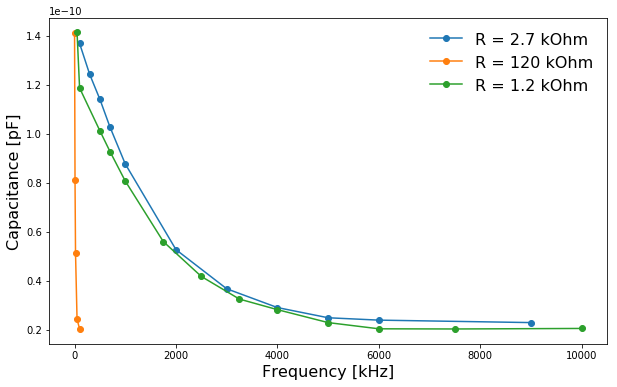

In [399]:
plt.figure(figsize=(10,6))
plt.plot(f1[1:]*1e-3,CX1[1:],'o-',label='R = 2.7 kOhm')
plt.plot(f2*1e-3,CX2,'o-',label='R = 120 kOhm')
plt.plot(f3*1e-3,CX3,'o-',label='R = 1.2 kOhm')

plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Capacitance [pF]',fontsize=16)
plt.legend(frameon=False, fontsize=16)

## Taking the setup off and using it on a known capacatence so we can understand what is going on


In [173]:
f     = np.array([10e3,100e3,500e3,1e6,5e6,10e6,15e6,20e6,25e6]) # Hz
VG    = np.array([2.92,2.994,2.987,2.984,2.92,2.77,2.56,2.33,2.1]) # V
VX    = np.array([2.88,2.956,2.893,2.736,1.329,0.7104,0.4669,0.345,0.2646]) # V
alpha = np.array([0.6,2.4,10.4,19.7,53.7,57.16,54,49.16,43.7]) # degrees
RS = 2.7e3 # Ohm
Cp = 10e-12 # F

In [174]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f*XC)
XX = 1./(2.*np.pi*f*(Ct))
CX = Ct - Cp
print('C = %s pF'%(CX*1e12))

C = [92.7851715  15.95472796 11.68725984 10.45737985  2.5356505   1.06180878
  1.46052775  1.84654888  2.35282314] pF


'\nplt.figure(figsize=(10,6))\n#plt.plot(f*1e-3,CX)\nplt.plot(f*1e-3,VG/XC)\nplt.scatter(f*1e-3,VG/XC)\n'

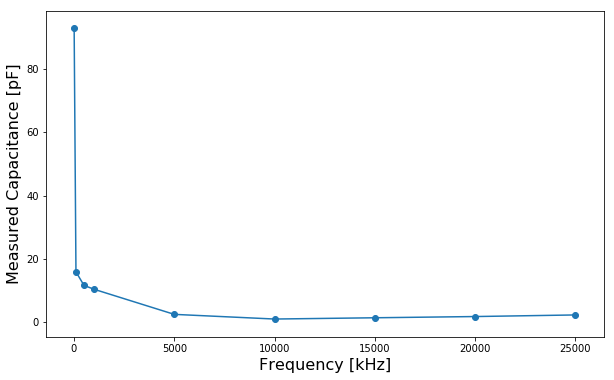

In [175]:
plt.figure(figsize=(10,6))
plt.plot(f*1e-3,CX*1e12)
plt.scatter(f*1e-3,CX*1e12)

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)
'''
plt.figure(figsize=(10,6))
#plt.plot(f*1e-3,CX)
plt.plot(f*1e-3,VG/XC)
plt.scatter(f*1e-3,VG/XC)
'''

In [181]:
np.mean(CX[4:]*1e12)

1.851471810693551

## from the above we decided we needed a higher Rs to get more into the smooth space


In [203]:
f     = np.array([1e3,10e3,50e3,73e3,75e3,100e3,300e3]) # Hz
VG    = np.array([2.939,2.922,2.968,2.982,2.984,2.994,2.995]) # V
VX    = np.array([2.819,2.808,2.176,1.799,1.763,1.454,0.618]) # V
alpha = np.array([1.7,9.3,36.5,45.0,45.3,50.1,50.1]) # degrees
RS = 120e3 # Ohm
Cp = 10e-12 # F

In [204]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f*XC)
XX = 1./(2.*np.pi*f*(Ct))
CX = Ct - Cp
print('C = %s pF'%(CX*1e12))

C = [59.26502034 12.29060924  7.42154835  5.21927211  5.15130882  3.71371682
  2.12101766] pF


'\nplt.figure(figsize=(10,6))\n#plt.plot(f*1e-3,CX)\nplt.plot(f*1e-3,VG/XC)\nplt.scatter(f*1e-3,VG/XC)\n'

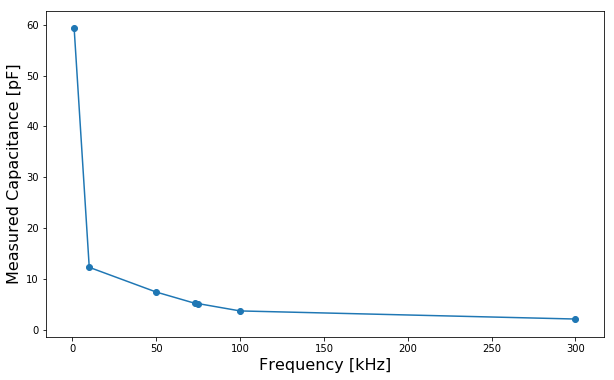

In [205]:
plt.figure(figsize=(10,6))
plt.plot(f*1e-3,CX*1e12)
plt.scatter(f*1e-3,CX*1e12)

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)
'''
plt.figure(figsize=(10,6))
#plt.plot(f*1e-3,CX)
plt.plot(f*1e-3,VG/XC)
plt.scatter(f*1e-3,VG/XC)
'''

In [215]:
f     = np.array([500e3,500e3,500e3]) # Hz
VG    = np.array([4.951,4.961,4.971]) # V
VX    = np.array([0.718,0.728,0.738]) # V
alpha = np.array([42.2,42.3,42.4]) # degrees
RS = np.array([118e3,120e3,122e3]) # Ohm
Cp = 10e-12 # F

In [216]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f*XC)
XX = 1./(2.*np.pi*f*(Ct))
CX = Ct - Cp
print('C = %s pF'%(CX*1e12))

C = [2.37236193 1.99151844 1.62784889] pF


'\nplt.figure(figsize=(10,6))\n#plt.plot(f*1e-3,CX)\nplt.plot(f*1e-3,VG/XC)\nplt.scatter(f*1e-3,VG/XC)\n'

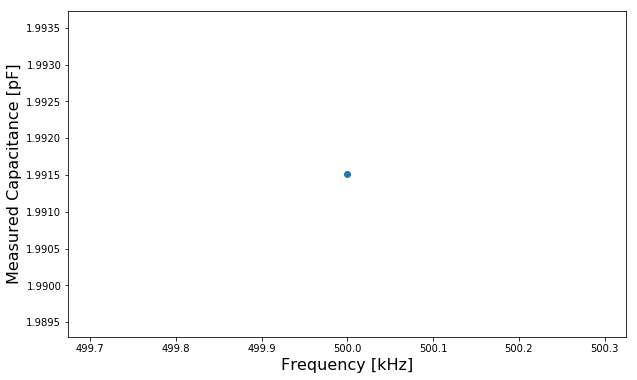

In [208]:
plt.figure(figsize=(10,6))
plt.plot(f*1e-3,CX*1e12)
plt.scatter(f*1e-3,CX*1e12)

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)
'''
plt.figure(figsize=(10,6))
#plt.plot(f*1e-3,CX)
plt.plot(f*1e-3,VG/XC)
plt.scatter(f*1e-3,VG/XC)
'''

## Below is the measurements of the capacatence  between the anode and ground

In [391]:
f1 = np.array([50e3,100e3,300e3,500e3,700e3,1e6,2e6,3e6,4e6,5e6,6e6,9e6]) # Hz
VG = np.array([5.926,5.977,5.968,5.926,5.889,5.855,5.777,5.743,5.704,5.659,5.607,5.386]) # V
VX = np.array([5.57,5.786,5.546,5.131,4.667,3.977,2.481,1.699,1.266,1.008,0.829,0.507]) # V
alpha = np.array([3.2,6.0,17.1,27.0,35.2,45.0,62.9,70.7,74.3,76.1,76.6,77.7]) # degrees
RS = 1.2e3 # Ohm
Cp = 10e-12 # F

In [392]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f1*XC)
XX = 1./(2.*np.pi*f1*(Ct))
CX1 = Ct - Cp

In [393]:
print('C = %s pF'%(CX1*1e12))

C = [217.87048592 136.92541719 124.24384774 114.11438834 102.71682217
  87.70504427  52.6463633   36.64732901  28.96676321  24.79775005
  23.82995911  22.82488571] pF


Text(0, 0.5, 'Measured Capacitance [pF]')

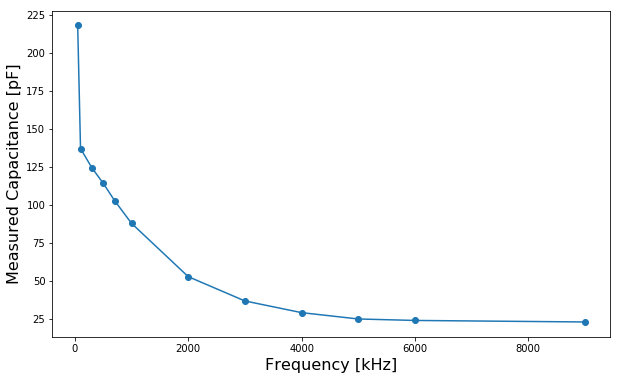

In [394]:
plt.figure(figsize=(10,6))
plt.plot(f1*1e-3,CX1*1e12,'o-')

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)


## Below is the measurements of the capacatence  between the anode and ground at 1 bar

In [415]:
f1 = np.array([50e3,100e3,300e3,500e3,700e3,1e6,2e6,3e6,4e6,5e6,6e6,9e6]) # Hz
VG = np.array([5.930,5.980,5.967,5.926,5.892,5.846,5.778,5.754,5.716,5.658,5.607,5.388]) # V
VX = np.array([5.764,5.789,5.548,5.134,4.668,3.975,2.480,1.698,1.266,1.007,0.827,0.507]) # V
alpha = np.array([3.1,6.0,17.1,27.0,35.3,45.0,62.9,70.6,74.3,76.1,76.7,78.0]) # degrees
RS = 1.2e3 # Ohm
Cp = 10e-12 # F

In [416]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f1*XC)
XX = 1./(2.*np.pi*f1*(Ct))
CX2 = Ct - Cp

In [417]:
print('C = %s pF'%(CX2*1e12))

C = [154.14153973 136.9176219  124.15312394 114.03429759 102.88269997
  87.60016921  52.68298479  36.97295081  29.04969823  24.82648315
  23.67318126  22.06413277] pF


Text(0, 0.5, 'Measured Capacitance [pF]')

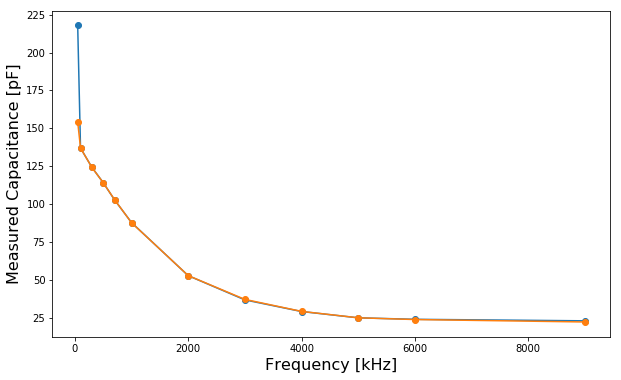

In [418]:
plt.figure(figsize=(10,6))
plt.plot(f1*1e-3,CX1*1e12,'o-')
plt.plot(f1*1e-3,CX2*1e12,'o-')

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)


## Below is the measurements of the capacatence  between the anode and ground at 5 bar

In [461]:
f1 = np.array([50e3,100e3,300e3,500e3,700e3,1e6,2e6,3e6,4e6,5e6,6e6,9e6]) # Hz
VG = np.array([5.928,5.981,5.969,5.930,5.893,5.857,5.787,5.751,5.713,5.658,5.605,5.385]) # V
VX = np.array([5.760,5.787,5.549,5.134,4.668,3.975,2.479,1.696,1.265,1.008,0.828,0.508]) # V
alpha = np.array([3.17,6.0,17.1,27.0,35.3,45.0,63.0,70.7,74.3,76.1,76.6,78.1]) # degrees
RS = 1.2e3 # Ohm
Cp = 10e-12 # F

In [462]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f1*XC)
XX = 1./(2.*np.pi*f1*(Ct))
CX3 = Ct - Cp

In [463]:
print('C = %s pF'%(CX3*1e12))

C = [157.5124063  137.1604575  124.17968862 114.12677287 102.90294515
  87.79074714  52.64593676  36.7966571   29.06017775  24.79152907
  23.85910962  21.72491289] pF


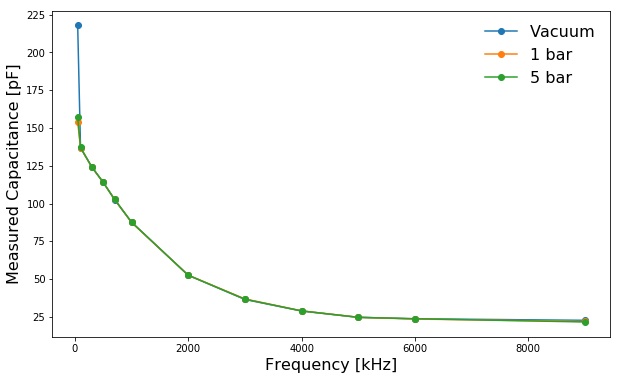

In [464]:
plt.figure(figsize=(10,6))
plt.plot(f1*1e-3,CX1*1e12,'o-',label='Vacuum')
plt.plot(f1*1e-3,CX2*1e12,'o-',label='1 bar')
plt.plot(f1*1e-3,CX3*1e12,'o-',label='5 bar')

#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)
plt.legend(frameon=False,fontsize=16)

## Below is the measurements of the capacatence  between the anode and ground at 10.4 bar

In [490]:
f1 = np.array([50e3,100e3,300e3,500e3,700e3,1e6,2e6,3e6,4e6,5e6,6e6,9e6]) # Hz
VG = np.array([5.927,5.980,5.970,5.928,5.901,5.855,5.785,5.741,5.704,5.651,5.608,5.386]) # V
VX = np.array([5.760,5.785,5.546,5.131,4.664,3.971,2.477,1.695,1.264,1.007,0.827,0.507]) # V
alpha = np.array([3.2,6.0,17.2,27.0,35.3,45.0,63.0,70.7,74.3,76.1,76.6,78.0]) # degrees
RS = 1.2e3 # Ohm
Cp = 10e-12 # F

In [491]:
VRS = np.sqrt((VG*np.cos(np.deg2rad(alpha)) - VX)**2 + (VG*np.sin(np.deg2rad(alpha)))**2)
IG = VRS/RS
phi = np.rad2deg(np.arccos((VG*np.sin(np.deg2rad(alpha)))/VRS))
XC = VX/(IG*np.cos(np.deg2rad(alpha)))
Ct = 1./(2.*np.pi*f1*XC)
XX = 1./(2.*np.pi*f1*(Ct))
CX4 = Ct - Cp

In [492]:
print('C = %s pF'%(CX4*1e12))

C = [158.5353361  137.24568446 124.96343218 114.160716   103.16792311
  87.85835295  52.67525168  36.74221594  29.02913859  24.78289267
  23.91896671  22.05209929] pF


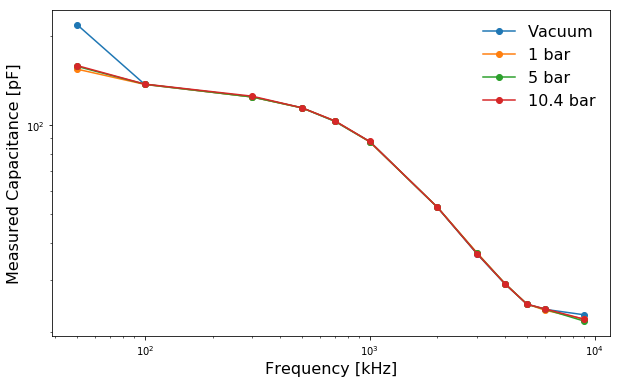

In [496]:
plt.figure(figsize=(10,6))
plt.plot(f1*1e-3,CX1*1e12,'o-',label='Vacuum')
plt.plot(f1*1e-3,CX2*1e12,'o-',label='1 bar')
plt.plot(f1*1e-3,CX3*1e12,'o-',label='5 bar')
plt.plot(f1*1e-3,CX4*1e12,'o-',label='10.4 bar')
plt.loglog()
#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Measured Capacitance [pF]',fontsize=16)
plt.legend(frameon=False,fontsize=16)

In [499]:
CX4/CX1

array([0.72765862, 1.00233899, 1.00579171, 1.00040598, 1.00439169,
       1.001748  , 1.00054873, 1.00258919, 1.00215334, 0.99940086,
       1.00373511, 0.96614281])

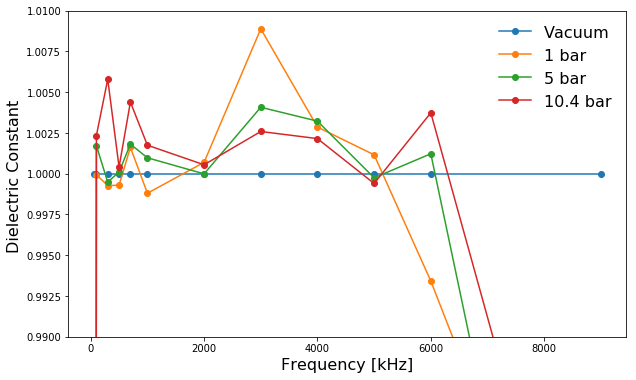

In [512]:
plt.figure(figsize=(10,6))
plt.plot(f1*1e-3,CX1/CX1,'o-',label='Vacuum')
plt.plot(f1*1e-3,CX2/CX1,'o-',label='1 bar')
plt.plot(f1*1e-3,CX3/CX1,'o-',label='5 bar')
plt.plot(f1*1e-3,CX4/CX1,'o-',label='10.4 bar')
plt.ylim(0.99,1.01)
#plt.plot(f*1e-3,VG/XC)
plt.xlabel('Frequency [kHz]',fontsize=16)
plt.ylabel('Dielectric Constant ',fontsize=16)
plt.legend(frameon=False,fontsize=16)